# Project No. 1 - MNIST
### Authors:
M. Alejandro Villalobos C.
Oscar Ruiz Ramirez
Sofia Vargas Aceves
### Fecha:
14 de Febrero, 2022

Description: Primer proyecto Machine Learning. 5 diferentes modelos que reconocen digitos escritos a mano (0-9)

## 1. Read Data


In [52]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,as_frame= False)

### Structure of the data

In [53]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [114]:
#Data es un arreglo que contiene 70,000 imagenes de 784 pixeles (28*28)
mnist["data"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [115]:
mnist.data.shape

(70000, 784)

In [55]:
#Target es un arreglo que contiene 70,000 etiquetas para las imagenes de data
mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [57]:
mnist.target.shape

(70000,)

## 2. Data Preprocessing

In [59]:
X, y = mnist["data"], mnist["target"]

In [60]:
X.shape

(70000, 784)

In [61]:
y.shape

(70000,)

In [62]:
X[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### Visualizando

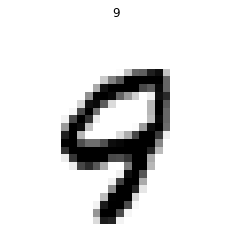

In [118]:
#visualizamos un numero en X y su etiqueta para asegurarnos que funcione
import matplotlib as mpl
import matplotlib.pyplot as plt

un_numero = 42069
any_digit_image = X[un_numero].reshape(28,28)
plt.imshow(any_digit_image,cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.title(y[un_numero])

plt.show()

### Training y test set:

In [65]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [108]:
#Aqui haremos las variables especialmente para el modelo CNN, ya que se necesita estar en 3 dimensiones, 28 x 28 x 1
X_trainCNN = X_train.reshape(60000,28,28,1)
X_testCNN = X_test.reshape(10000,28,28,1)

In [67]:
y_test.shape

(10000,)

In [68]:
y_train.shape

(60000,)

## 3. Model Creation

### Model #1 Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=50.0 / y_train.shape[0], penalty="l1", solver="saga", tol=0.1)

### Model #2 Support Vector Machine (SVM)

In [70]:
from sklearn import svm
SVM = svm.SVC()

### Model #3 Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10)

### Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [72]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()

### Model #5 Convolutional Neural Network (CNN)

In [73]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras 
from keras.models import Sequential
from keras.layers import  Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

#convert classes to one hot vectors
y_trainCNN = keras.utils.to_categorical(y_train)
y_testCNN = keras.utils.to_categorical(y_test)

CNN = Sequential()

CNN.add(Conv2D(64, kernel_size=3, input_shape=(28,28,1), activation='relu'))
CNN.add(Conv2D(32, kernel_size=3, activation='relu'))

CNN.add(Flatten())
CNN.add(Dense(10, activation='softmax'))

CNN.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [74]:
X_testCNN[1].shape

(28, 28, 1)

## 4. Training: Adjust Model with Historic Data

### Model #1 Logistic Regression

In [75]:
LR.fit(X_train, y_train)

LogisticRegression(C=0.0008333333333333334, penalty='l1', solver='saga',
                   tol=0.1)

### Model #2 Support Vector Machine (SVM)

In [76]:
SVM.fit(X_train, y_train)

SVC()

### Model #3 Random Forest

In [77]:
RFC = RFC.fit(X_train, y_train)

### Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [78]:
MLP.fit(X_train, y_train)

MLPClassifier()

### Model #5 Convolutional Neural Network (CNN)

In [79]:
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

mc = ModelCheckpoint("./bestmodel.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es, mc]

#his = CNN.fit(X_trainCNN, y_trainCNN, epochs=5, validation_split=0.3, callbacks=cb)

In [80]:
CNN.fit(X_trainCNN, y_trainCNN, validation_data=(X_testCNN, y_testCNN),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2044 - accuracy: 0.9531 - val_loss: 0.1002 - val_accuracy: 0.9692
Epoch 2/3
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0668 - accuracy: 0.9799 - val_loss: 0.0797 - val_accuracy: 0.9779
Epoch 3/3
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0461 - accuracy: 0.9852 - val_loss: 0.0933 - val_accuracy: 0.9772


## 5. Prediction for New Data

### Model #1 Logistic Regression

In [81]:
y_predictLR = LR.predict(X_test)

In [82]:
y_test[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

In [83]:
y_predictLR[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

### Model #2 Support Vector Machine (SVM)

In [84]:
y_predictSVM = SVM.predict(X_test)

In [85]:
y_test[:15]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1'], dtype=object)

In [86]:
y_predictSVM[:15]

array(['7', '2', '1', '0', '4', '1', '4', '9', '6', '9', '0', '6', '9',
       '0', '1'], dtype=object)

### Model #3 Random Forest

In [87]:
y_predictRFC = RFC.predict(X_test)

In [88]:
y_test[:15]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1'], dtype=object)

In [89]:
y_predictRFC[:15]

array(['7', '2', '1', '0', '4', '1', '4', '4', '5', '9', '0', '6', '9',
       '0', '1'], dtype=object)

### Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [90]:
y_predictMLP = MLP.predict(X_test)

In [91]:
y_test[:20]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1', '5', '9', '7', '3', '4'], dtype=object)

In [92]:
y_predictMLP[:20]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1', '5', '9', '7', '3', '4'], dtype='<U1')

### Model #5 Convolutional Neural Network (CNN)

In [122]:
y_predictCNN = CNN.predict_classes(X_testCNN)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [124]:
y_test[:20]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1', '5', '9', '7', '3', '4'], dtype=object)

In [125]:
y_predictCNN[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=int64)

## 6. Visualization of Results

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### Model #1 Logistic Regression

In [97]:
cross_val_score(LR, X_train, y_train, cv=3, scoring = "accuracy")

array([0.91605, 0.9132 , 0.9175 ])

In [98]:
accuracy_score(y_test,y_predictLR)

0.9235

### Model #2 Support Vector Machine (SVM)

In [99]:
cross_val_score(SVM, X_train, y_train, cv=3, scoring = "accuracy")

array([0.977 , 0.9738, 0.9739])

In [100]:
accuracy_score(y_test,y_predictSVM)

0.9792

### Model #3 Random Forest

In [101]:
cross_val_score(RFC, X_train, y_train, cv=3, scoring = "accuracy")

array([0.9422 , 0.93725, 0.9421 ])

In [102]:
accuracy_score(y_test,y_predictRFC)

0.9506

### Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [103]:
cross_val_score(MLP, X_train, y_train, cv=3, scoring = "accuracy")

array([0.9528 , 0.9588 , 0.95795])

In [104]:
accuracy_score(y_test,y_predictMLP)

0.9638

### Model #5 Convolutional Neural Network (CNN)

In [127]:
score = CNN.evaluate(X_trainCNN, y_trainCNN)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0253 - accuracy: 0.9915


In [129]:
score = CNN.evaluate(X_testCNN, y_testCNN)

313/313 [==============================] - 1s 5ms/step - loss: 0.0933 - accuracy: 0.9772
